# 時間序列分析中的 STL 分解

本教學展示如何在時間序列資料上執行 STL（季節性與趨勢分解，使用 Loess）分解。STL 分解是一種強大的工具，可用於理解時間序列中的基礎組成，包括季節性模式、趨勢與殘差。

我們將進行：

- 匯入所需套件
- 載入並探索 AirPassengers 資料集
- 執行 STL 分解
- 視覺化並解讀季節性、趨勢與殘差組成
- 辨識高、低季

**參考資料：**

- [statsmodels STL 文件](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.STL.html)
- [AirPassengers 資料集](https://vincentarelbundock.github.io/Rdatasets/articles/data.html)

## 1. 匯入所需套件

我們將匯入 pandas、matplotlib 及 statsmodels 套件，分別用於資料處理、視覺化與 STL 分解。

In [1]:
# 匯入所需套件
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
import statsmodels.api as sm

## 2. 載入並探索資料集

我們將使用 `AirPassengers` 資料集，內容為 1949 至 1960 年每月國際航空旅客總數。資料集將載入並將時間欄設為索引。先顯示前幾列以了解其結構。

In [2]:
# 載入 AirPassengers 資料集
# https://vincentarelbundock.github.io/Rdatasets/articles/data.html
data = sm.datasets.get_rdataset("AirPassengers", "datasets").data

# 新增時間欄並設為索引
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='ME')
data.set_index('time', inplace=True)

# 顯示前 24 筆資料
data.head(24)

value
time             
1949-01-31    112
1949-02-28    118
1949-03-31    132
1949-04-30    129
1949-05-31    121
1949-06-30    135
1949-07-31    148
1949-08-31    148
1949-09-30    136
1949-10-31    119
1949-11-30    104
1949-12-31    118
1950-01-31    115
1950-02-28    126
1950-03-31    141
1950-04-30    135
1950-05-31    125
1950-06-30    149
1950-07-31    170
1950-08-31    170
1950-09-30    158
1950-10-31    133
1950-11-30    114
1950-12-31    140

## 3. 執行 STL 分解

我們將使用 statsmodels 的 STL 類別將時間序列分解為三個組成：
- **季節性**：捕捉資料中的重複模式或週期。
- **趨勢**：反映序列的長期變化。
- **殘差**：移除季節性與趨勢後剩餘的變異。

In [3]:
# 執行 STL 分解
stl = STL(data['value'], seasonal=13)
result = stl.fit()

STL 分解中的 `seasonal=13` 參數指定資料的季節週期長度。以下說明為何在本例使用 13，以及如何在其他情境下決定此參數：

### **為何 AirPassengers 使用 `seasonal=13`？**
1. **每月資料**：AirPassengers 資料集為每月資料。
2. **年度季節性**：資料呈現明顯年度季節循環，即每 12 個月重複一次。
3. **奇數視窗長度**：STL 需要季節平滑視窗為奇數。12 為偶數，因此選用最接近的奇數 13 以捕捉年度季節性。

### **如何決定其他情境的 seasonal 參數**
1. **了解資料頻率**：
   - 若資料為每日，考慮是否有每週、每月或每年週期。
   - 若資料為每小時，考慮每日或每週週期。
   - 若資料為每月，則多為年度週期。
2. **辨識季節週期**：
   - 觀察資料重複模式，例如：
     - 每日資料有每週週期 → `seasonal=7`。
     - 每月資料有年度週期 → `seasonal=13`（或最接近 12 的奇數）。
   - 可用領域知識或資料視覺化協助判斷。
3. **選擇奇數**：
   - STL 需要季節平滑視窗為奇數，若週期長度為偶數，選擇最接近的奇數。
4. **實驗與驗證**：
   - 若不確定，可嘗試不同 `seasonal` 參數並評估分解結果，觀察季節性與趨勢是否平滑且殘差噪音最小。

### **範例調整**：
- **每日資料有每週季節性**：用 `seasonal=7`。
- **每小時資料有每日季節性**：用 `seasonal=25`（接近 24 小時）。
- **每季資料有年度季節性**：用 `seasonal=5`（接近 4 季）。

理解資料頻率與週期後，即可決定 STL 分解的 `seasonal` 參數。

## 4. 季節性組成

季節性組成代表資料中的重複模式或週期。以下將擷取並視覺化季節性組成。

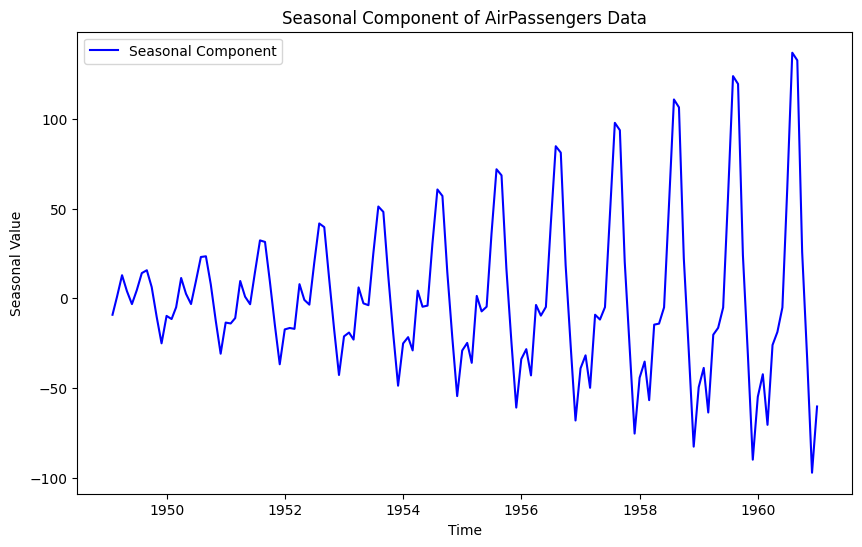

In [5]:
# 擷取並視覺化季節性組成
plt.figure(figsize=(10, 6))
plt.plot(
  result.seasonal, # 季節性組成
  label='Seasonal Component',
  color='blue'
)
plt.title('Seasonal Component of AirPassengers Data')
plt.xlabel('Time')
plt.ylabel('Seasonal Value')
plt.legend()
plt.show()

### 高／低季

STL 分解的季節性組成可協助辨識資料中的高季與低季。以下說明如何分析季節性組成以判斷這些時期：

辨識高、低季步驟：
1. 擷取季節性組成：季節性組成反映資料中的重複模式。高峰代表高季，低谷代表低季。
2. 找出最大與最小值：辨識季節性組成中最高與最低值所對應的月份或時期。
3. 視覺化季節性組成：用折線圖觀察重複模式，並以視覺方式辨識高、低季。
4. 標註高、低季：可在圖上註記或建立表格明確標示高、低季。

High season occurs in: 1960-07-31 00:00:00
Low season occurs in: 1960-11-30 00:00:00


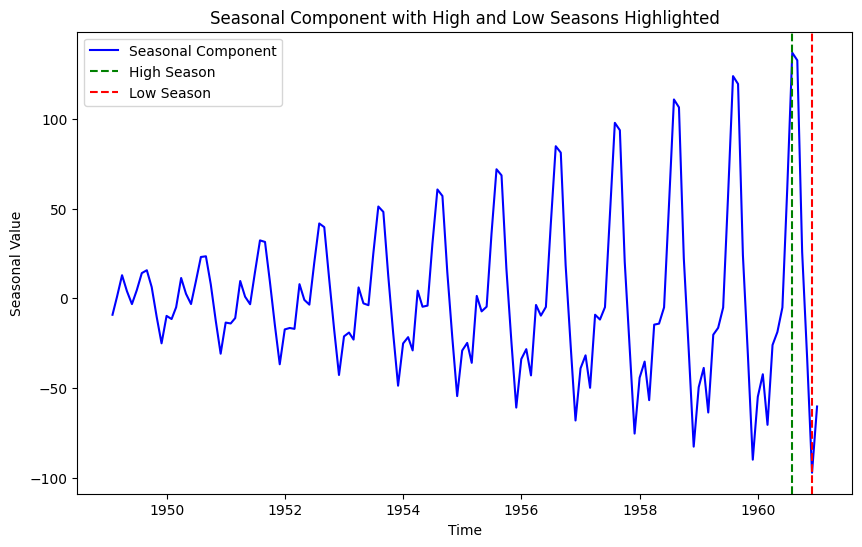

In [6]:
# 擷取季節性組成
seasonal = result.seasonal

# 找出季節性最高與最低的月份
high_season = seasonal.idxmax()
low_season = seasonal.idxmin()

print(f"High season occurs in: {high_season}")
print(f"Low season occurs in: {low_season}")

# 視覺化季節性組成並標註高、低季
plt.figure(figsize=(10, 6))
plt.plot(seasonal, label='Seasonal Component', color='blue')
plt.axvline(high_season, color='green', linestyle='--', label='High Season')
plt.axvline(low_season, color='red', linestyle='--', label='Low Season')
plt.title('Seasonal Component with High and Low Seasons Highlighted')
plt.xlabel('Time')
plt.ylabel('Seasonal Value')
plt.legend()
plt.show()

## 5. 趨勢組成

趨勢組成代表時間序列的長期變化。以下將擷取並視覺化趨勢組成。

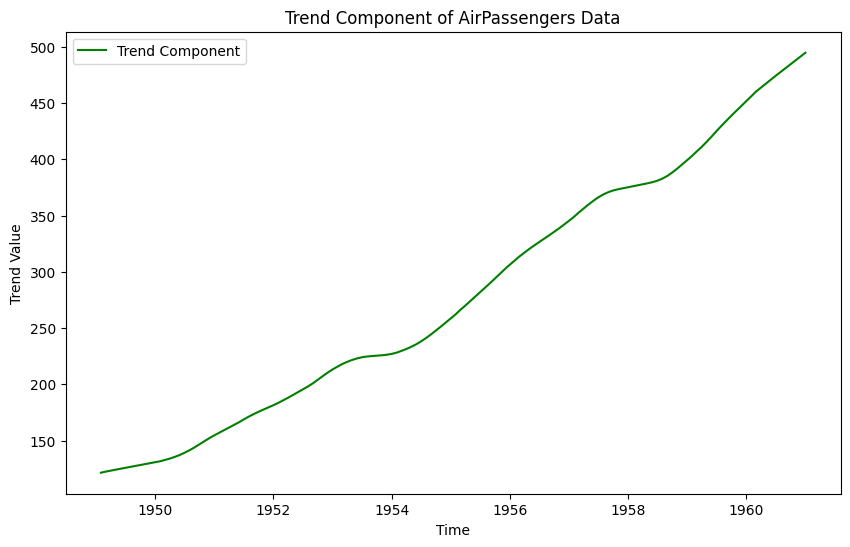

In [8]:
# 擷取並視覺化趨勢組成
plt.figure(figsize=(10, 6))
plt.plot(
  result.trend, # 趨勢組成
  label='Trend Component',
  color='green'
)
plt.title('Trend Component of AirPassengers Data')
plt.xlabel('Time')
plt.ylabel('Trend Value')
plt.legend()
plt.show()

## 6. 殘差組成

殘差組成代表移除季節性與趨勢後，資料剩餘的變異。以下將擷取並視覺化殘差組成。

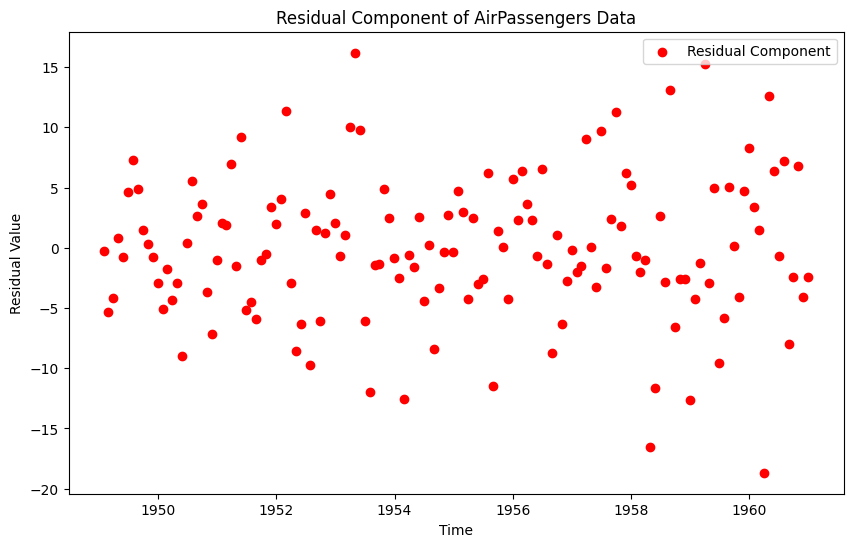

In [9]:
# 擷取並視覺化殘差組成
plt.figure(figsize=(10, 6))
plt.scatter(
  result.resid.index, # 時間索引
  result.resid, # 殘差組成
  label='Residual Component',
  color='red'
)
plt.title('Residual Component of AirPassengers Data')
plt.xlabel('Time')
plt.ylabel('Residual Value')
plt.legend()
plt.show()

## 7. 分解結果視覺化

STL 分解結果提供內建方法可同時視覺化所有組成（季節性、趨勢、殘差）。以下使用此方法快速總覽分解結果。

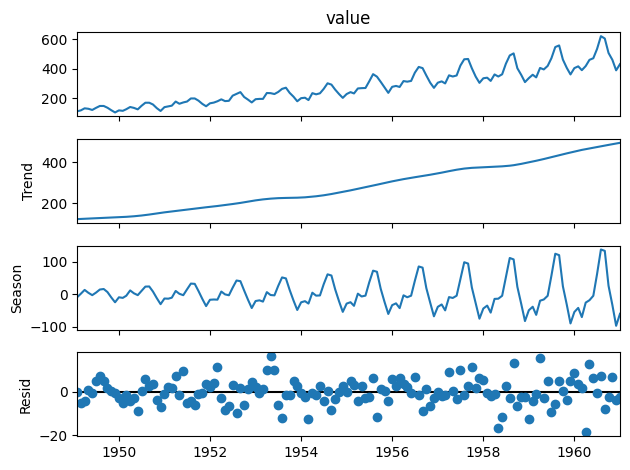

In [8]:
# 同時視覺化所有組成
result.plot()
plt.show()

## 8. 組成分析

### 季節性組成
季節性組成揭示資料中的重複模式，例如每月或每年循環。以 AirPassengers 資料為例，可觀察到明顯的年度季節性，高峰與低谷分別對應特定月份。

### 趨勢組成
趨勢組成顯示旅客人數隨時間穩定成長，反映觀察期間國際航空旅運的成長趨勢。

### 殘差組成
殘差組成捕捉資料中的隨機雜訊或未解釋的變異。分析殘差有助於辨識異常或不規則現象。

### 應用意義
STL 分解是時間序列分析的有力工具，可協助我們分離並研究各組成，對於預測、異常偵測及理解資料動態特別有幫助。